# Task

With AI-modelling and Data Science there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column `ocean_proximity`, then you only have numeric columns which will simplify your analysis. Remember, this is a POC! 
3. You have missing values in your data (not sure you do but you can assume so). Handle this with `SimpleImputer(strategy="median")`. (Check the fantastic Scikit-learn documentation for details.) Notice, the `SimpleImputer` should only be used for transformation on the validation and test data, not fitting.
4. Split your data into `X` and `y`, and then into train, validation and test sets. 
5. Create one `LinearRegression` model and one `Lasso` model. For the `Lasso` model, use `GridSearchCV` to optimize $\alpha$ values. Choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

6. Which model is best on the validation data? 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. 
What are your conclusions? Note: to be 100% sure, you should re-fit your chosen model on the combination of train+val data. 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

------------
Bonus question for those who have time and are ambitious: Redo everything above (copy your code) but in step 2, include the column `ocean_proximity` which is a categorical column. 

# Code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

In [3]:
# Below, set your own path where you have stored the data file if it is not in the /data folder. 
#housing = pd.read_csv(r'data/housing.csv')
housing = pd.read_csv(r"C:\Priya\Data_Scientist\Machine_Learning\ds24_ml-main\ds24_ml-main\kunskapskontroll_1\data\housing.csv")

In [4]:
print(housing) 


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [5]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [6]:
#For bonous project
housing_O = housing.copy()

## EDA

In [7]:
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [8]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [9]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


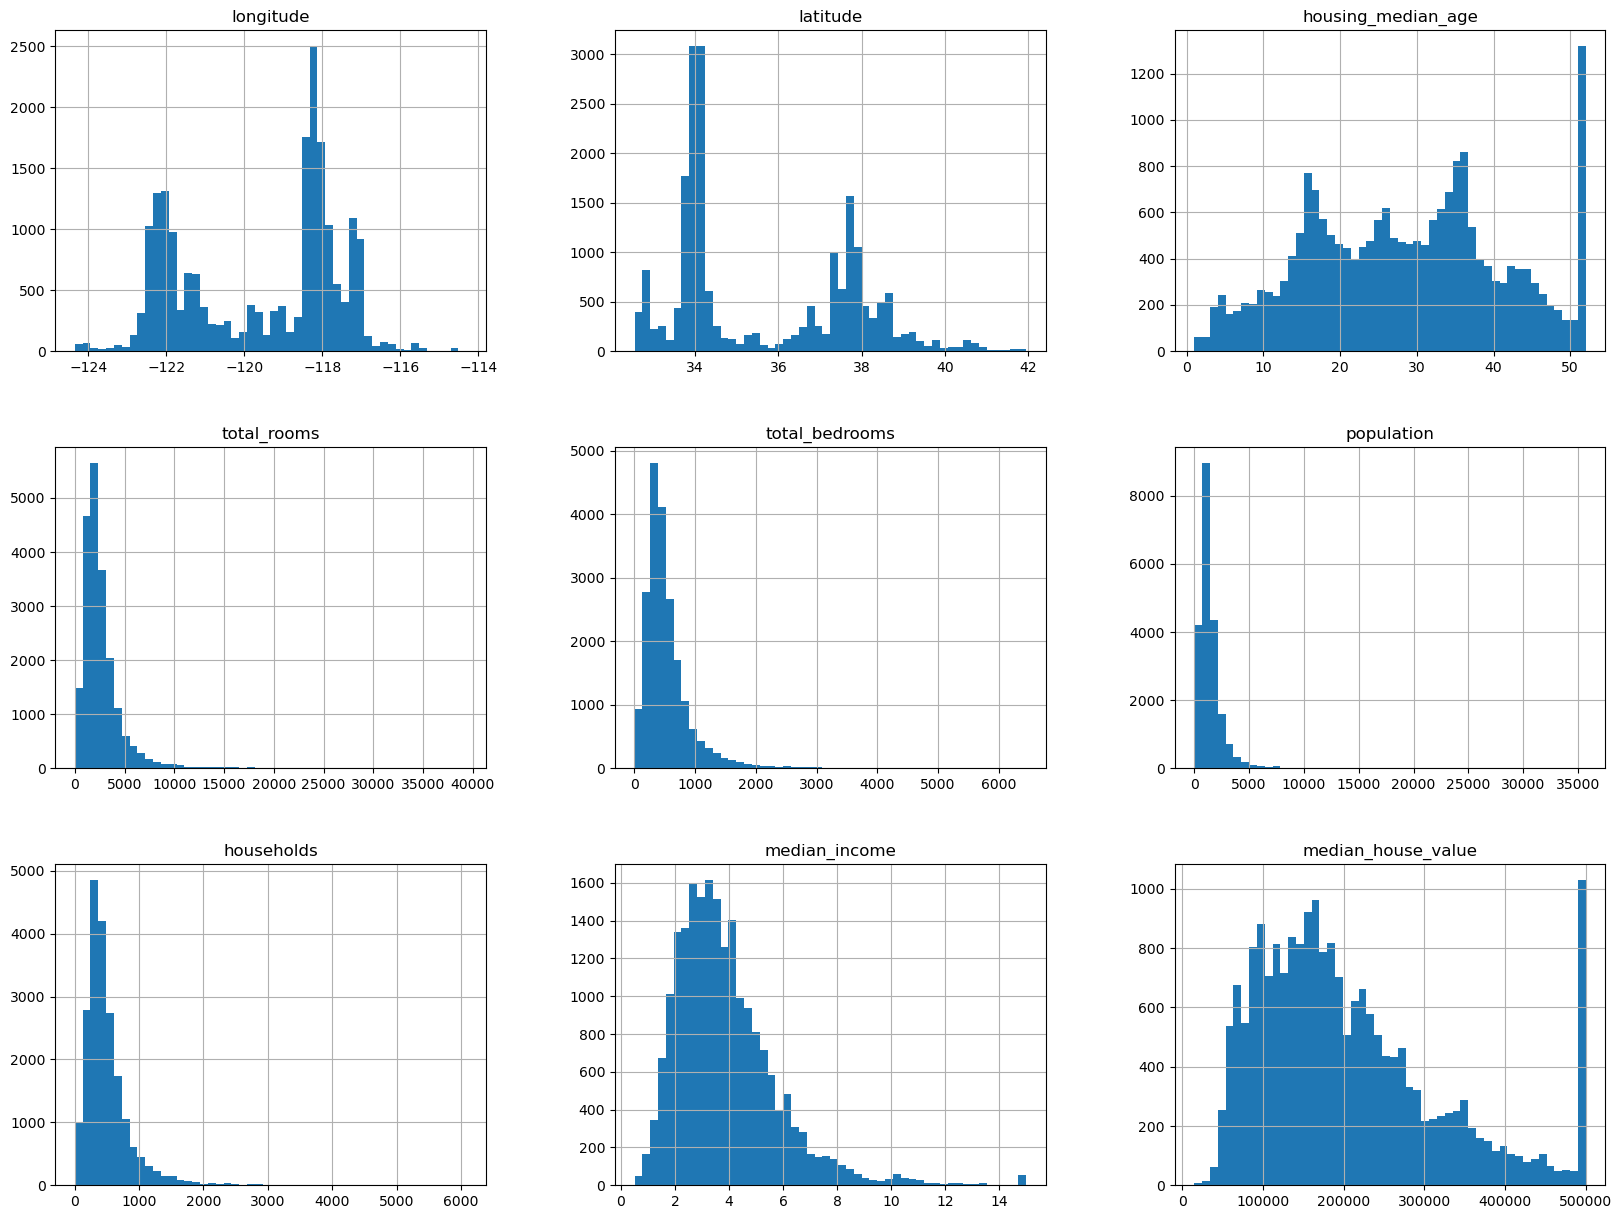

In [10]:
housing.hist(bins =50, figsize=(20,15))
plt.show()

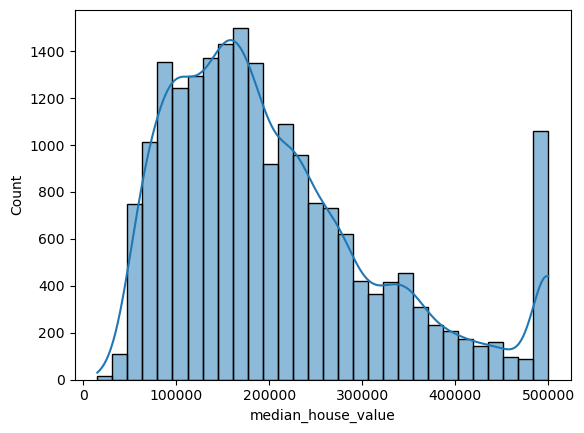

In [11]:
sns.histplot(housing['median_house_value'], bins = 30, kde = True)
plt.show()

## Preparing data

In [12]:
#Drop the column Ocean_proximity
housing  = housing.drop("ocean_proximity", axis = 1)

In [13]:
X = housing.drop("median_house_value", axis = 1)
y = housing["median_house_value"]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [14]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size =0.3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size =0.3, random_state =42) 

<Axes: >

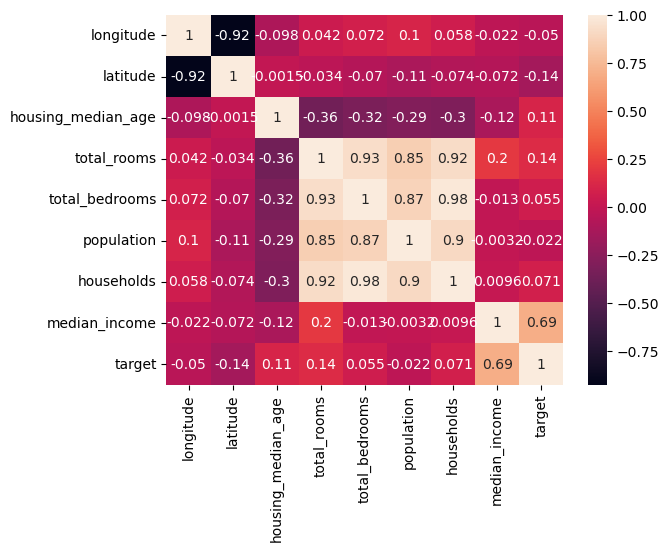

In [15]:
# Placing all the data in "df" so I can make a nice correlation plot
df = X_train.copy()
df['target'] = y_train

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [16]:
# Define preprocessing pipeline (SimpleImputer for missing values)
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)  # Fit on train and transform it
X_val = imputer.transform(X_val)   #  transform validation
X_test = imputer.transform(X_test)  # transform test data


In [17]:
X_train_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068


In [18]:
X_train_full.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.584102,35.650669,28.575374,2644.939230,539.828281,1427.927326,501.070598,3.876892
std,2.002930,2.135742,12.613634,2163.054433,419.786747,1140.225190,382.221220,1.904908
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.940000,18.000000,1456.750000,296.000000,791.000000,280.000000,2.567225
50%,-118.510000,34.270000,29.000000,2131.000000,437.000000,1168.000000,411.000000,3.539100
75%,-118.010000,37.720000,37.000000,3169.250000,648.000000,1727.000000,607.000000,4.758075
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100


In [19]:
y_train_full.head()

7061     193800.0
14689    169700.0
17323    259800.0
10056    136100.0
15750    500001.0
Name: median_house_value, dtype: float64

In [20]:
y_train_full.describe()

count     14448.000000
mean     206923.960894
std      115749.242298
min       14999.000000
25%      119300.000000
50%      179300.000000
75%      264600.000000
max      500001.000000
Name: median_house_value, dtype: float64

## Models

In [21]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# make predictions on validations set
y_val_pred_lin = lin_reg.predict(X_val)
rmse_lin = np.sqrt(mean_squared_error(y_val, y_val_pred_lin))


print("RMSE_lr:",rmse_lin)

RMSE_lr: 71381.54765613227


In [22]:
# Lasso Regression with GridSearchCV
lasso = Lasso()
param_grid = {'alpha': [ 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_lasso = grid_search.best_estimator_

#make predictions on the validation set
y_val_pred_lasso = best_lasso.predict(X_val)
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))

print(grid_search.best_params_)
print("RMSE_lasso:", rmse_lasso)


{'alpha': 10}
RMSE_lasso: 71382.12179213912


## Evaluation

In [23]:
# Choose the best model based on RMSE
best_model = lin_reg if rmse_lin < rmse_lasso else best_lasso

print("best_model :", best_model)

best_model : LinearRegression()


In [24]:
X_final_train = np.vstack((X_train, X_val))
y_final_train = np.hstack((y_train, y_val))
best_model.fit(X_final_train, y_final_train)


LinearRegression()

In [25]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Chosen model RMSE on test set: {rmse_test}')

Chosen model RMSE on test set: 69692.71231999066


In [26]:
(rmse_test)/(np.mean(y_test))

0.33717361616791514

## Conclusions

In [27]:
# 5. Conclusion & Presentation
print("POC Presentation:")
print("1. We explored the housing dataset and identified key patterns.")
print("2. We handled missing values using SimpleImputer(strategy='median').")
print("3. We trained and evaluated two models: Linear Regression and Lasso Regression.")
print("4. Linear Regression had a validation RMSE of ", ("{:.4f}".format(rmse_lin)) ,"while Lasso Regression had a validation RMSE of ",("{:.4f}".format(rmse_lasso)), ".")
print("5. Based on validation performance, we chose the Linear Regression model.") 
print("6. The chosen model had a test RMSE of ", ("{:.4f}".format(rmse_test)) , "after re-fitting on the combined train+val data.")
print("7. Conclusion: Chosen model test RMSE indicating that the model is not generalizing well and  the relative RMSE is 33.7% of the average house price,which is quite large and may indicate a problematic model. Create new features like rooms per household, bedrooms per room, population per household might helps for Improvement.")


POC Presentation:
1. We explored the housing dataset and identified key patterns.
2. We handled missing values using SimpleImputer(strategy='median').
3. We trained and evaluated two models: Linear Regression and Lasso Regression.
4. Linear Regression had a validation RMSE of  71381.5477 while Lasso Regression had a validation RMSE of  71382.1218 .
5. Based on validation performance, we chose the Linear Regression model.
6. The chosen model had a test RMSE of  69692.7123 after re-fitting on the combined train+val data.
7. Conclusion: Chosen model test RMSE indicating that the model is not generalizing well and  the relative RMSE is 33.7% of the average house price,which is quite large and may indicate a problematic model. Create new features like rooms per household, bedrooms per room, population per household might helps for Improvement.


## Including Ocean_proximity


In [28]:
housing_O.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Axes(0.125,0.11;0.775x0.77)


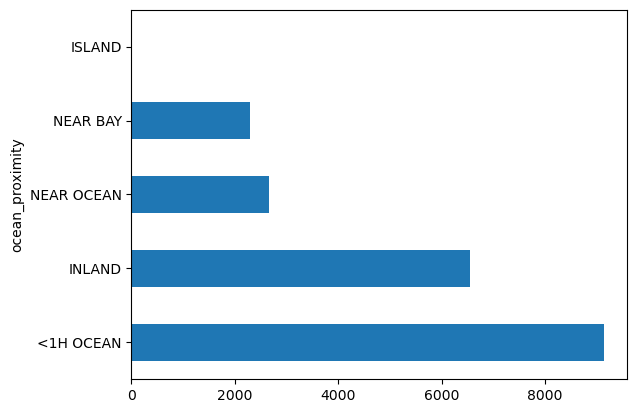

In [29]:
print(housing_O["ocean_proximity"].value_counts().plot(kind = "barh"))

In [ ]:
print(housing_O["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [ ]:
housing_O.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Separate numeric and categorical features
numeric_features = housing_O.drop(columns=['ocean_proximity', 'median_house_value']).columns.tolist()
categorical_features = ['ocean_proximity']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Define preprocessor
numeric_transformer = SimpleImputer(strategy="median")
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [ ]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# Split data into features (X) and target (y)
X = housing_O.drop(columns=['median_house_value'])
y = housing_O['median_house_value']


In [ ]:
# Split data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)


In [ ]:
# Define Linear Regression pipeline
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_model.fit(X_train, y_train)
y_val_pred_lr = lr_model.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))


print('lr_rmse:', lr_rmse)


lr_rmse: 70287.50570405758
